In [1]:
from coreLib.dataset import DataSet
from coreLib.utils import create_dir,LOG_INFO
data_dir       = "/home/apsisdev/ansary/DATASETS/synthdata_source"
ds=DataSet(data_dir)
save_dir       = "/home/apsisdev/ansary/DATASETS/"
#create dirs
save_dir   =  create_dir(save_dir,"bangla_short")
imgs_dir   =  create_dir(save_dir,"imgs")
charmap_dir  =  create_dir(save_dir,"charmaps")
wordmap_dir  =  create_dir(save_dir,"wordmaps")



 39%|███▉      | 78526/200840 [00:00<00:00, 785257.00it/s]

#LOG     :All paths found


  2%|▏         | 17119/1059977 [00:00<00:11, 88300.14it/s]

#LOG     :Processing Dictionary:/home/apsisdev/ansary/DATASETS/synthdata_source/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 1339022.36it/s]


#LOG     :converting int labels to string


  2%|▏         | 7565/370098 [00:00<00:04, 75649.53it/s]

#LOG     :Processing Dictionary:/home/apsisdev/ansary/DATASETS/synthdata_source/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 790516.89it/s]


#LOG     :bangla.graphemes


100%|██████████| 10305/10305 [00:00<00:00, 6646517.41it/s]

#LOG     :bangla.numbers
#LOG     :english.graphemes
#LOG     :english.numbers



100%|██████████| 112763/112763 [00:00<00:00, 6499145.31it/s]

#LOG     :common.symbols
#LOG     :bangla.fonts
#LOG     :english.fonts
#LOG     :common.background
#LOG     :common.noise.random



100%|██████████| 3240/3240 [00:00<00:00, 5880374.28it/s]

#LOG     :common.noise.sign


In [2]:
from coreLib.config import config
vars(config)

mappingproxy({'__module__': 'coreLib.config',
              'min_num_lines': 1,
              'max_num_lines': 10,
              'min_num_words': 1,
              'max_num_words': 10,
              'min_word_len': 1,
              'max_word_len': 10,
              'min_num_len': 1,
              'max_num_len': 10,
              'comp_dim': 128,
              'min_num_sym': 1,
              'max_mun_sym': 5,
              'word_min_space': 50,
              'word_max_space': 100,
              'vert_min_space': 0,
              'vert_max_space': 100,
              'back_dim': 1024,
              'back_margin': 300,
              'min_line_height': 32,
              '__dict__': <attribute '__dict__' of 'config' objects>,
              '__weakref__': <attribute '__weakref__' of 'config' objects>,
              '__doc__': None})

In [56]:
config.min_num_lines=1
config.max_num_lines=2
config.comp_dim=32
config.min_line_height=4
config.word_min_space=5
config.word_max_space=10
config.vert_max_space=10

In [34]:
from coreLib.render_short import createSceneImage,backgroundGenerator,createImageData
from coreLib.word_short import create_word
backGen=backgroundGenerator(ds,dim=(config.back_dim,config.back_dim))
back=next(backGen)

100%|██████████| 982/982 [00:00<00:00, 5752523.08it/s]


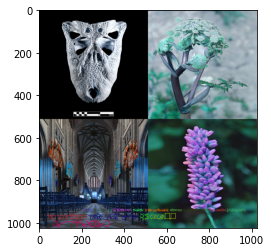

In [57]:
import matplotlib.pyplot as plt
# data execution
page,labels=createSceneImage(ds)
back=createImageData(backGen,page,labels)
plt.imshow(back)

In [76]:
# -*-coding: utf-8 -
'''
    @author: MD. Nazmuddoha Ansary
'''
#--------------------
# imports
#--------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt
#--------------------
# format
#--------------------

def get_targets(page,labels):
    '''
        @author
        create a function to convert page image to total text format data
        This should not depend on- 
            * language or 
            * type (handwritten/printed) or 
            * data(number/word/symbol)
        args:
            page   :     marked image of a page given at letter by letter 
            labels :     list of markings for each word
        returns:
            whatever is necessary for the total-text format
         
    '''
    # word_mask
    word_mask=np.zeros(page.shape)
    # char mask
    char_mask=np.zeros(page.shape)
    heatmap=get_gaussian_heatmap(size=,distanceRatio=1.5)
    for line_labels in labels:
        for label in line_labels:
            for k,v in label.items():
                if v!=' ':
                    char_mask[page==k]=255
                    _label_mask[page==k]=255
                    idx = np.where(page==k)
                    
                    y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
                    x1=x_min
                    y1=y_max
                    x2=x_max
                    y2=y_max
                    x3=x_max
                    y3=y_min
                    x4=x_min
                    y4=y_min
                    character_points = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]]).astype('float32') 
                
    char_mask=char_mask.astype("uint8")
    word_mask=word_mask.astype("uint8")
    plt.imshow(char_mask)
    plt.show()
    plt.imshow(word_mask)
    plt.show()

#     #return char_mask#,word_mask

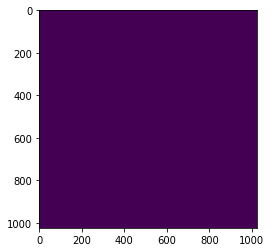

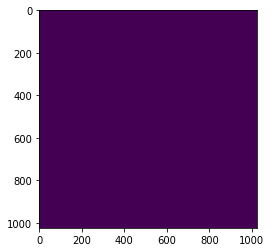

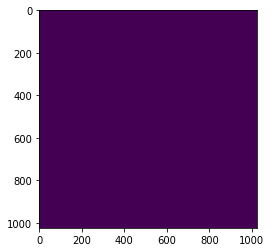

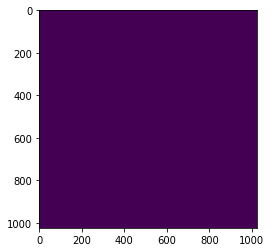

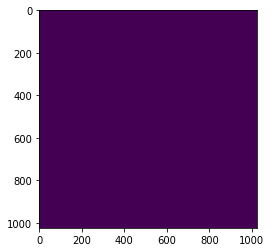

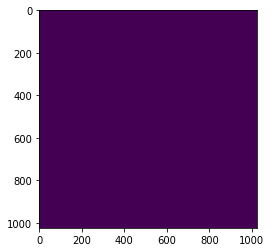

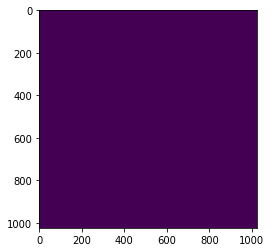

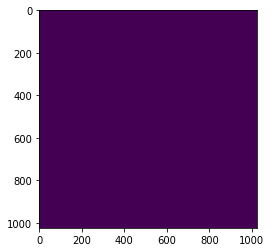

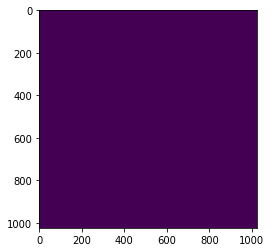

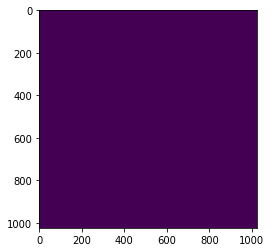

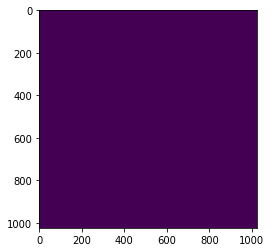

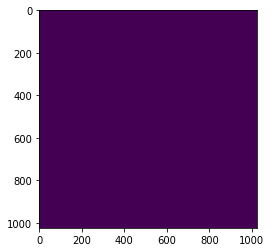

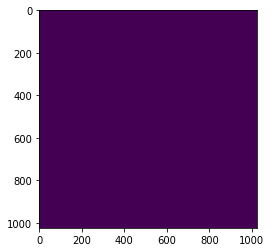

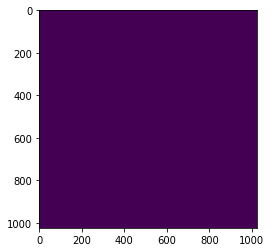

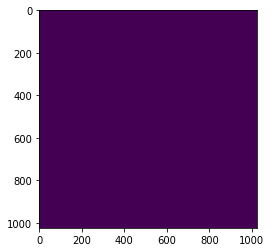

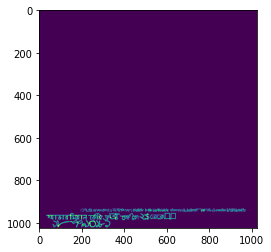

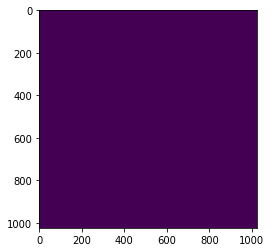

In [77]:
get_targets(page,labels)

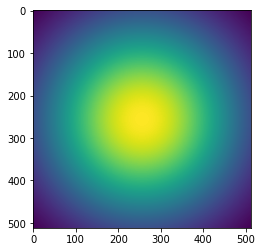

In [80]:
def get_gaussian_heatmap(size=512, distanceRatio=1.5):
    '''
        creates a gaussian heatmap
        This is a fixed operation to create heatmaps
    '''
    # distrivute values
    v = np.abs(np.linspace(-size / 2, size / 2, num=size))
    # create a value mesh grid
    x, y = np.meshgrid(v, v)
    # spreading heatmap
    g = np.sqrt(x**2 + y**2)
    g *= distanceRatio / (size / 2)
    g = np.exp(-(1 / 2) * (g**2))
    g *= 255
    return g.clip(0, 255).astype('uint8')
# fixed heatmap
heatmap=get_gaussian_heatmap(size=512,distanceRatio=1.5)
plt.imshow(heatmap)

In [81]:
# source bbobx of heatmap
src = np.array([[0, 0], 
                [heatmap.shape[1], 0], 
                [heatmap.shape[1], heatmap.shape[0]],
                [0, heatmap.shape[0]]]).astype('float32')


In [ ]:
# transforms the bbox and creates the heatmap
MA = cv2.getPerspectiveTransform(src=src,dst=character_points)
textmap += cv2.warpPerspective(heatmap_text, MA, dsize=(textmap.shape[1],textmap.shape[0])).astype('float32')
